# K-Means Clustering

The following notebook is a guided exploration of the k-means clustering algorithm on a dataset of 200 simulated customers.

Your job is to fill in the missing code-blocks and analyze the outputs that your code produces.

Credit to [Nitesh Yadav](https://www.kaggle.com/niteshyadav3103) for the notebook.

Modifications to instructions and code are indicated via a note from me: (*Note*: ...)

In [4]:
# import libraries

# TODO: complete these 4 lines of code to import `pandas`, `numpy`, `matplotlib.pyplot` and `seaborn`
import ...
import ...
import ...
import ...

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# TODO: create 'df' dataframe using the 'Mall_Customers.csv' file

...

In [13]:
# TODO: print out the first 5 rows of this dataframe to note its samples

...

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [14]:
# TODO: print out the shape of this dataframe to note the number of samples

...

(200, 4)

This dataset describes 200 simulated shoppers. We have a generated "spending score" column, which describes how often this customer makes purchases at the mall, as well as their age and annual income in thousands of dollars. 

Currently, we do not have any associated labels on these customers. Let's segement this database into best tight-knit clusters in order to observe patterns of structure within this dataset.

Before moving forward howevever, there is one column that offers *no* predictive capabilities and simply used as an identifier. Once you've identified this column, drop it from your dataframe.

In [ ]:
# TODO: drop the unneeded column be sure to do this in place

... 

## EDA

Within the code-blocks below, implement a light EDA to begin formulating a hypothesis. Keep in mind, we must always do our *due dillagence* before exploring a dataset. This will come in the form of exploring various graphs and statistics.

In [ ]:
# TODO: utilize the `describe` method to view dataframe summary statistics

...

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


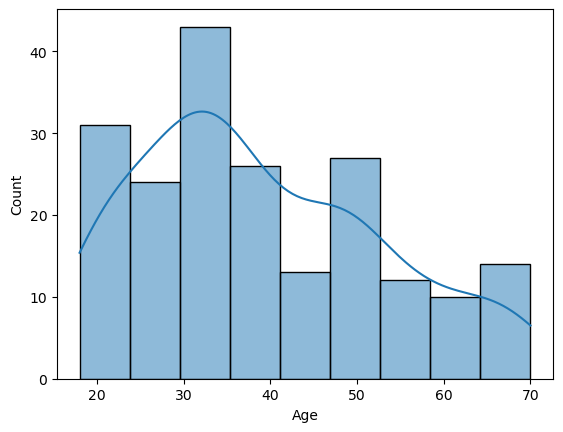

In [15]:
# create a histplot for Age

sns.histplot(df["Age"], kde=True)
plt.show()

In [ ]:
# TODO: create a histplot for Annual Income

...

In [ ]:
# TODO: create a histplot for Spending Score

...

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


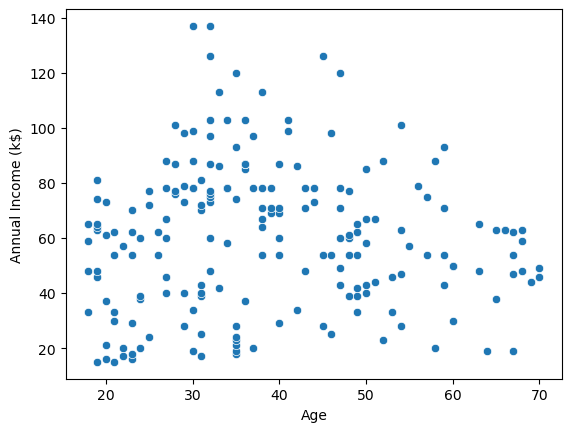

In [16]:
# create a scatter plot between Age & Annual Income

sns.scatterplot(data=df, x="Age", y="Annual Income (k$)")

plt.show()

In [ ]:
# TODO: create a scatter plot between Age & Spending Score

...

In [ ]:
# TODO: create a scatter plot between Income & Spending Score

...

In [17]:
# create a new column called "Age_labels" in this dataframe that assigns 5 quartile-cut bin labels using the "Age" column

df["Age_labels"] = pd.qcut(df["Age"], 5)

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


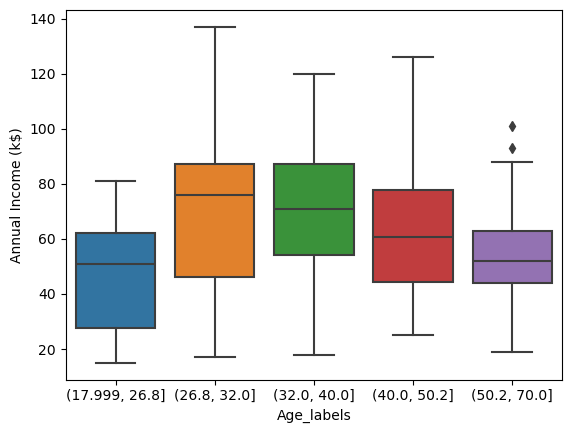

In [19]:
# create a box-plot using these age labels to describe "Annual Income (k$)"

sns.boxplot(data=df, x="Age_labels", y="Annual Income (k$)")
plt.show()

In [ ]:
# TODO: create a box-plot using these age labels to describe "Spending Score (1-100)"

...

In [ ]:
# TODO: create a new column called "Income_labels" in this dataframe that assigns 5 quartile-cut bin labels using the "Annual Income (k$)" column

...

In [ ]:
# TODO: create a box-plot using these income labels to describe "Spending Score (1-100)"

...

In [ ]:
# TODO: create a new column called "income_counts" in this dataframe that assigns 5 NON-QUARTILE cut bin labels using the "Annual Income (k$)" column
# DOCUMENTATION: qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

...

In [ ]:
# TODO: calculate the value-counts of this "income_counts" column
# DOCUMENTATION: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html


...

In [ ]:
# TODO: create a new column called "age_counts" in this dataframe that assigns 5 NON-QUARTILE cut bin labels using the "Age" column

...

In [ ]:
# TODO: calculate the value-counts of this "age_counts" column


...

## EDA Self-reflection

Answer these 5 questions as a group. Write your answer in the respective markdown blocks below.

Do you notice any relationship amongst Age & Income, Income & Spending Score, or Age & Spending Score? If so, point out which graphs indicate this.

write answers here

 Which statistic can you use to define strength of linear relationship?

write answers here

Which age group has the highest median annual income? Which graph indicates this?

write answers here

Which is the largest age group in this dataset?

write answers here

Which is the largest income group in this dataset?

write answers here

## KMeans on 2 parameters without Scaling

First, let's observe how we can create a Kmeans clustering algorithm without any standard scaling. Keep in mind, the world of machine learning entails a combination of theory and experimentation. If you'd like to discover whether a specific technique will help, try out both and see their outcomes. 

We will start off with an analysis on 2 variables: `spending score` and `age`.

As you will recognize, we will first create an `elbow plot` to recognize the best `K`. 

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

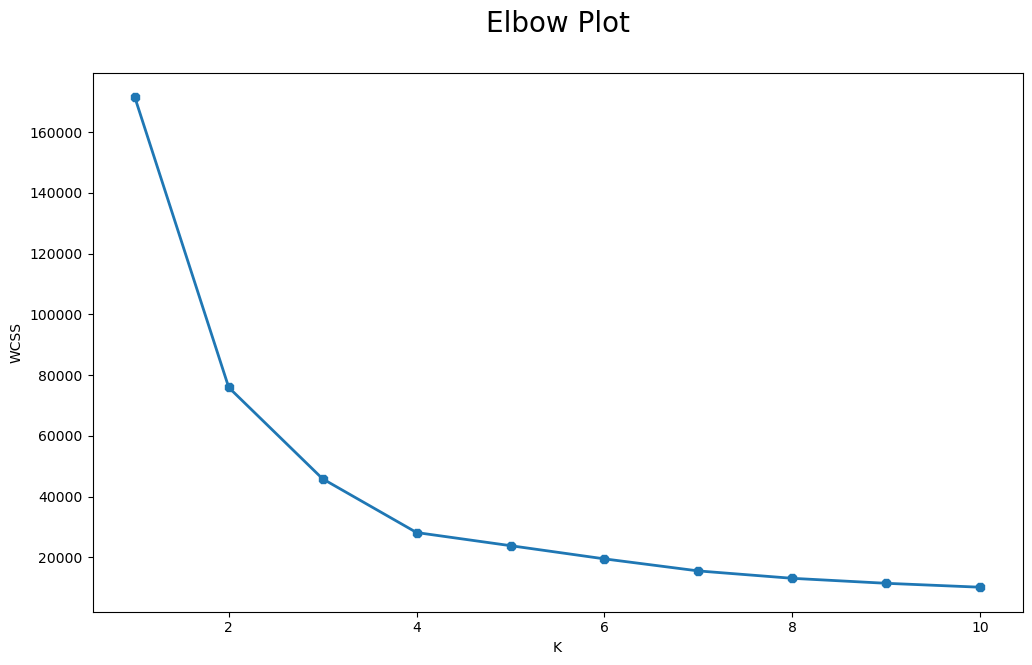

In [37]:
# create an elbow plot of WSS

X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

wcss= []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = KMeans(n_clusters = ..., init = '...')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

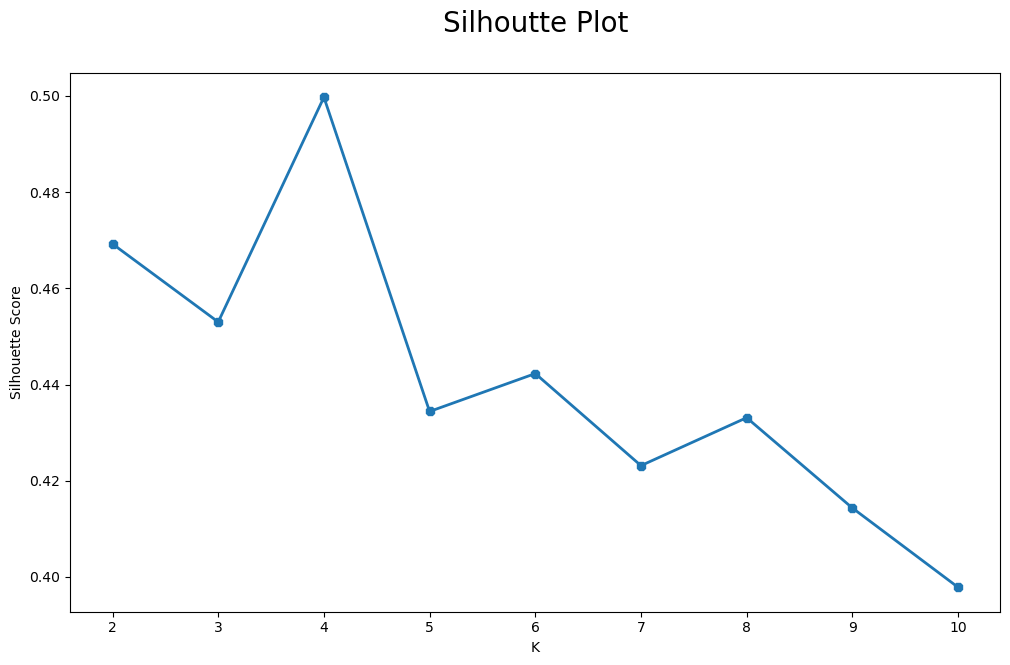

In [44]:
# create a plot of silhoutte score

silhouette = []
for k in range(2, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = ..., init = '...')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

According to the elbow & silhouette plots, what is the best number of clusters?

write answer here

In [ ]:
# TODO: create a KMeans object with this optimal number of clusters. Name this object `kmeans`

...

# TODO: fit this KMeans object using your `X1` data

...

In [24]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [25]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719]])

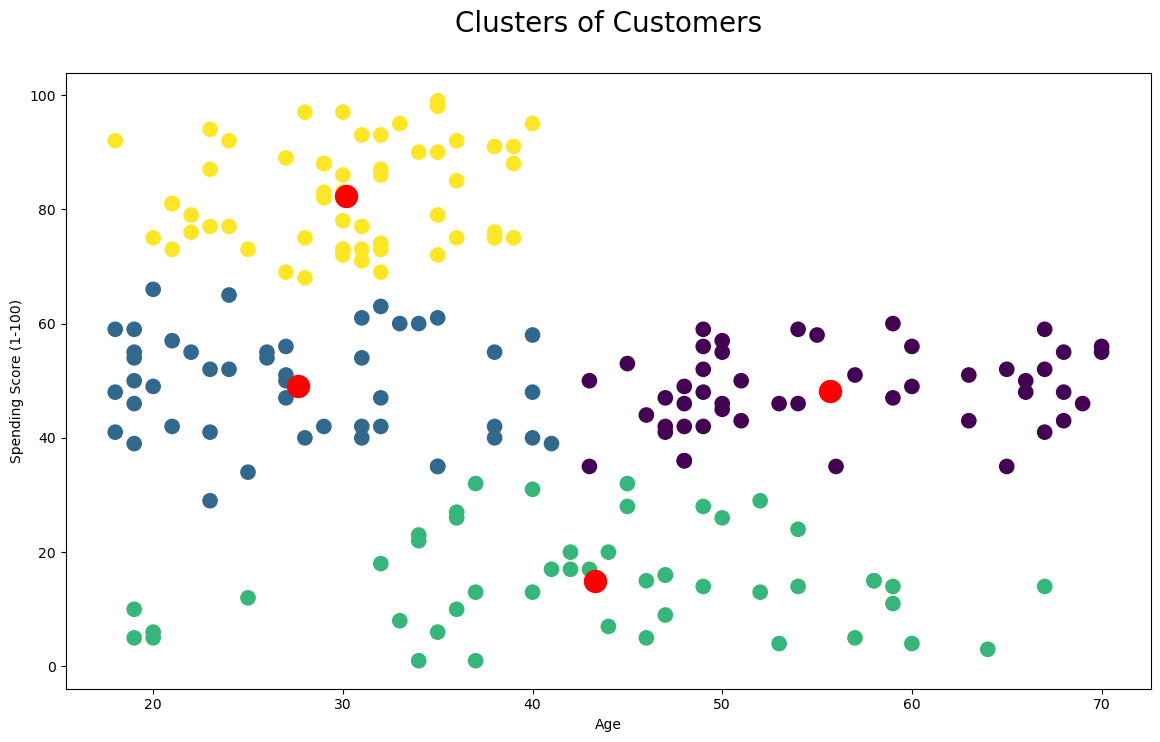

In [26]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## KMeans on 2 parameters with Scaling

Let's recreate this experiment, except this time we will include our StandardScaler.

In [46]:
# create an elbow plot of WSS on scaled values

# TODO: create and use the standard scaler object to ensure both variables have equal range
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = ...

# TODO: fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.___(X1)

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

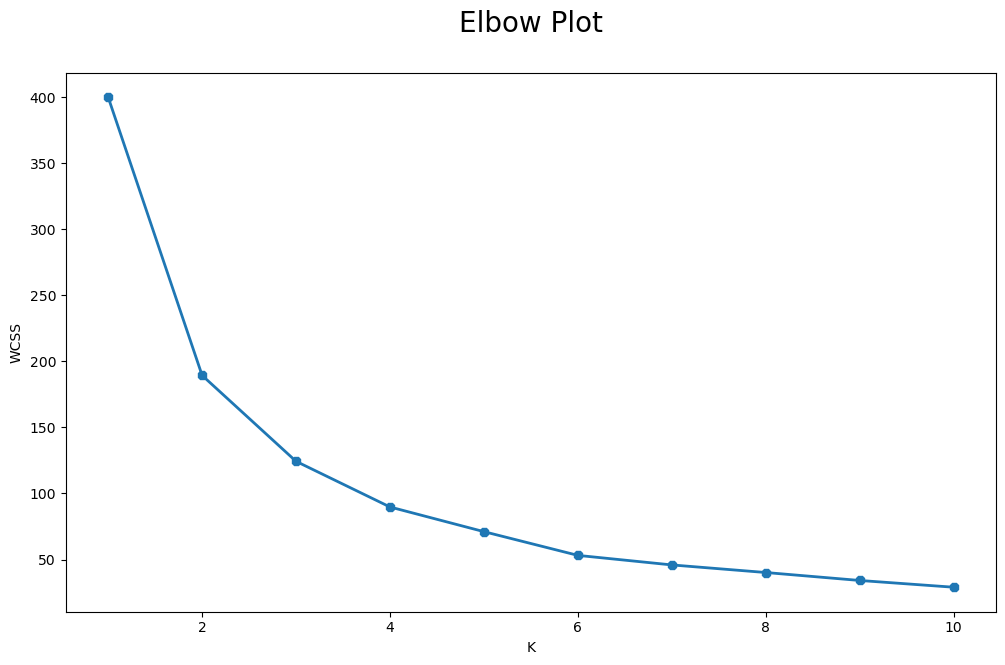

In [48]:
wcss_scaled = []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = ...

    # TODO: fit your kmeans algorithm on your scaled dataset
    kmeans.fit(...)

    # TODO: append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(...)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

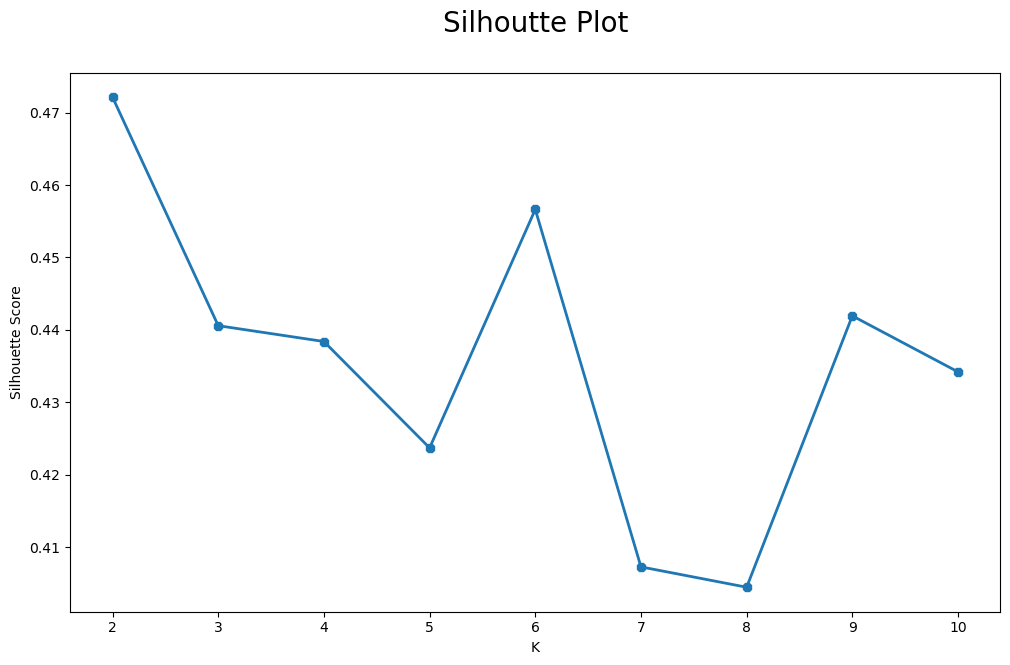

In [50]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = ....
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# TODO: create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = ...

# TODO: fit this KMeans object on your data

...

In [53]:
#TODO: Generate labels for the  dataset

labels = ...
labels

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 4, 1, 0, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 0, 3, 1, 4, 1,
       3, 1, 3, 1, 2, 0, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 5, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 5, 2, 2, 2, 5, 0, 2, 5, 0, 5, 2, 5, 0,
       2, 5, 0, 0, 5, 2, 5, 5, 5, 0, 2, 2, 0, 2, 5, 2, 5, 2, 0, 2, 2, 0,
       0, 2, 5, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 5, 0, 2, 0, 5, 2, 5, 5,
       5, 0, 2, 0, 0, 0, 5, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 4, 1, 3, 1, 4, 1, 3, 1, 0, 1, 4, 1, 2, 1, 4, 1, 4, 1, 3, 1,
       3, 1, 4, 1, 4, 1, 2, 1, 4, 1, 3, 1, 4, 1, 4, 0, 4, 1, 4, 1, 3, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 2, 1, 3, 1, 4, 1, 4, 1, 4, 1, 3, 1, 2, 1,
       4, 1])

In [54]:
# TODO: output the centroids of your clusters

...

array([[-0.98830286,  0.01062485],
       [-0.62254456,  1.24814723],
       [ 0.59071744, -0.16514902],
       [ 1.00613779, -1.40702839],
       [-0.37103379, -1.31216875],
       [ 1.86593393, -0.01358755]])

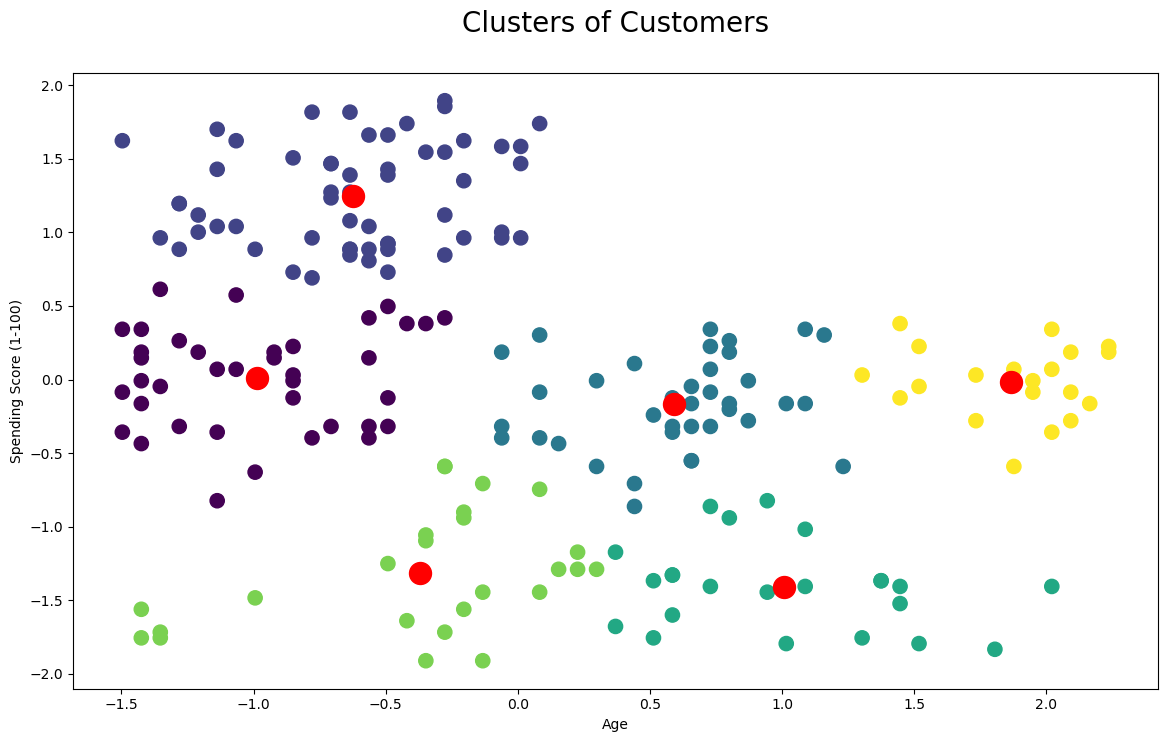

In [55]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Kmeans with all Predictors

Lastly, let's create a Kmeans clustering algorithm that looks at all of our numerical predictors

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

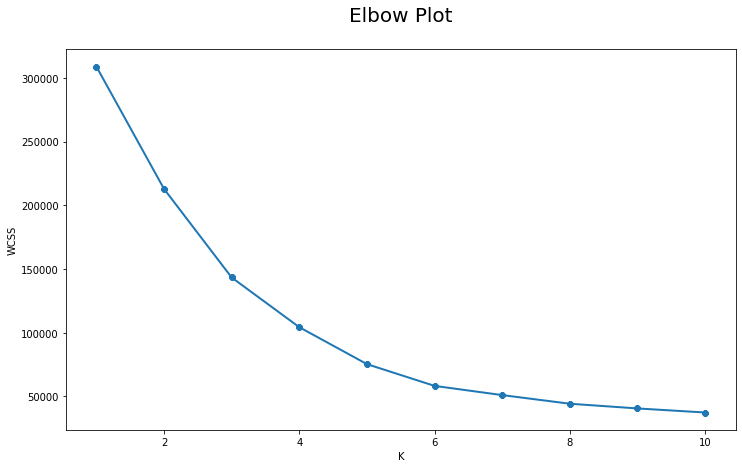

In [7]:
X4 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

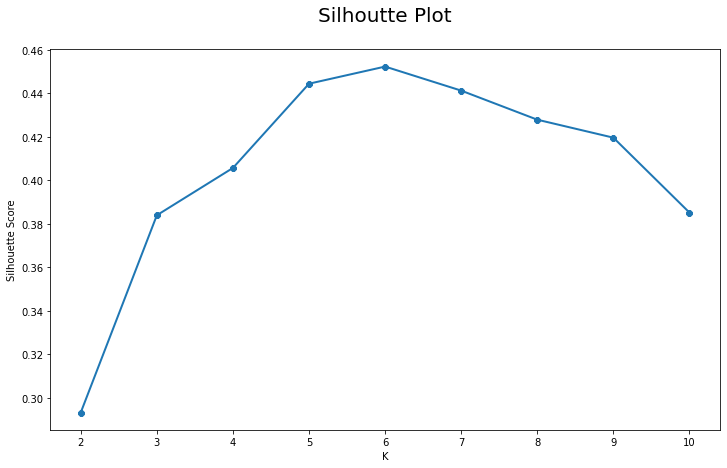

In [8]:
# create a plot of silhoutte score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X4)
    silhouette.append(metrics.silhouette_score(X4, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
# create a KMeans clustering algo on this optimal number of clusters and generate labels

kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X4)
X4['label'] = clusters

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
X4['label']

0      3
1      2
2      3
3      2
4      3
      ..
195    1
196    4
197    1
198    4
199    1
Name: label, Length: 200, dtype: int32

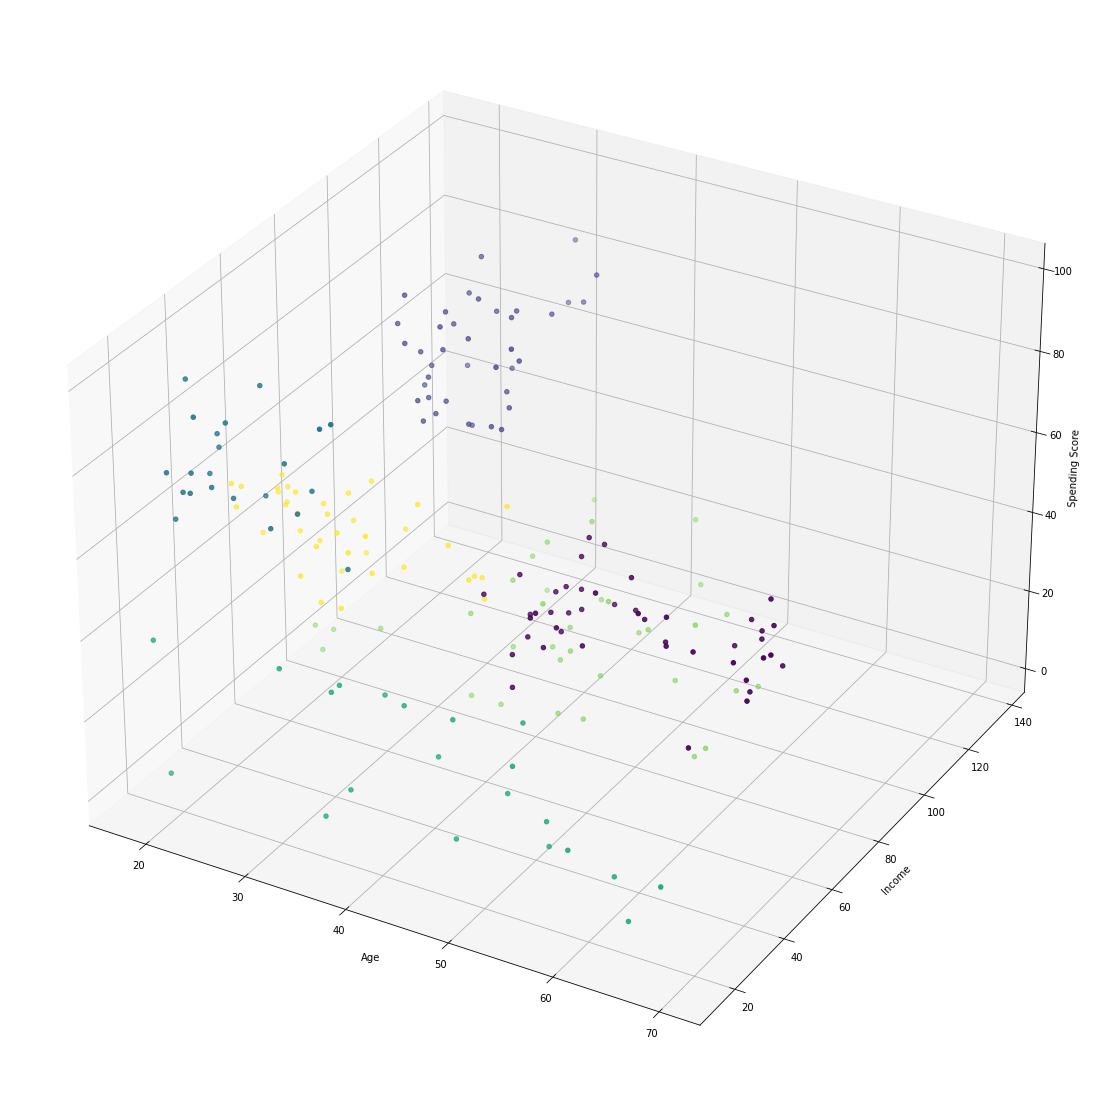

In [19]:
# make a 3D plot of clusters

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X4["Age"], X4["Annual Income (k$)"], X4["Spending Score (1-100)"], c=X4["label"])

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')

plt.gcf().set_size_inches((20, 20))  
plt.show()

## KMeans Retrospective

Answer these 5 questions as a group. Write your answer in the respective markdown blocks below.

How did our optimal number of clusters change after we applied the StandardScaler to our dataset that focused on `age` and `spending score`?

write answer here

Before we applied the standard scaler, which predictor's magnitude dominated our distance calculation? (`age` or `spending score`)

write answer here

How did our optimal number of clusters change after we included all of our numerical predictors, when compared to the dataset that only included `age` and `spending score`?

write answer here 

While a KMeans algorithm will assign cluster labels, it will not tell us what these labels mean. Take a look at the scatter plot that displays clusters you found for your unscaled `age` and `income` dataset. How would you label these 4 clusters? Be sure to speak specifically about the age & income range that you notice (i.e. high-income, 20-30 year old; low-income 20-30 year old)

Yellow -  
Green -  
Blue -   
Purple - 